In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.patches as patches
import librosa

%run graphing_function_recent.ipynb

In [2]:
#Use this for all adjustable values 
#input file paths here (include .csv):
video_path = r'\\10.25.16.5\yaochen\Active\DLC\Final_Models\Lindsey\escape_behavior_2-lindsey_christinger-2024-06-13_v1\V3_Tested2\coords_csv\CoordM9_t9_cage502_P2_Hanna_videoDLC_resnet50_escape_behavior_2Jun13shuffle1_1030000_filtered_day.csv'
time_path = r'\\10.25.16.5\yaochen\Active\Hanna\Escape_behavior\Variation3_EscapeBehavior_Hanna_062424\timestamp\M9_t9_cage502_P2_Hanna_timestamp0.csv'
audio_path = r'\\10.25.16.5\yaochen\Active\Hanna\Escape_behavior\Variation3_EscapeBehavior_Hanna_062424\audio\M9_t9_cage502_P2_Hanna_audio.wav'

#input coordinates for the shelter and platform 
north_pixel = 28
south_pixel = 464
east_pixel = 572
west_pixel = 105
shelter_x_pixel = 341
shelter_y_pixel = 72

#input info from time_and_audio info notebook (either from audacity or bonsai)
stimulus_start = 171.915 #stimulus start time
stimulus_end = 179.545 #stimulus end time
escape_done = 176.8 #time mouse reaches shelter location

In [3]:
#manually decide?
escape_response = True
freezing_response = False
#small_angle = 

In [4]:
#read in DLC data, convert to cm, center platform at 0,0
shelter_x, shelter_y, x_diam, y_diam, coord_scaled = single_mouse_data(north_pixel, south_pixel, east_pixel, west_pixel, shelter_x_pixel, shelter_y_pixel, video_path)

In [5]:
#replace any head, nose, or center points with likelihood < .9 with NA
filter_data(.8, coord_scaled)

In [6]:
#coord_filtered

In [7]:
coord_scaled

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine1_likelihood,center_x,center_y,center_likelihood,spine2_x,spine2_y,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood
0,0,0,NaN,NaN,0.001274,0.421656,32.374748,0.981366,-0.219390,32.110777,...,0.999951,1.378540,29.780784,0.999994,2.112928,28.430017,0.999999,2.840967,27.212246,0.999994
1,1,1,NaN,NaN,0.000978,0.439494,32.475594,0.936062,-0.204901,32.256739,...,0.999958,1.411749,29.780784,0.999995,2.126007,28.430017,1.000000,2.855265,27.212246,0.999997
2,2,2,NaN,NaN,0.000862,0.439494,32.475594,0.952386,-0.204901,32.256739,...,0.999959,1.413667,29.780784,0.999994,2.127410,28.430017,1.000000,2.860902,27.212246,0.999998
3,3,3,NaN,NaN,0.000887,0.439494,32.475594,0.954493,-0.219390,32.256739,...,0.999953,1.432139,29.759491,0.999993,2.140398,28.408097,1.000000,2.885222,27.182503,0.999998
4,4,4,NaN,NaN,0.000883,0.392445,32.307296,0.965063,-0.323902,32.043316,...,0.999974,1.476020,29.602859,0.999991,2.205632,28.280216,1.000000,2.891795,27.072397,0.999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5941,5941,5941,9.841343,-19.220922,0.999884,9.354333,-17.491488,0.999983,10.143958,-17.326758,...,0.999979,8.643898,-14.153954,0.999996,8.475882,-12.527767,0.999998,8.412967,-10.332080,0.999999
5942,5942,5942,9.756819,-19.278949,0.999640,9.354333,-17.659600,0.999981,10.178396,-17.487892,...,0.999985,8.677279,-14.303064,0.999997,8.480677,-12.694949,0.999998,8.412967,-10.401556,0.999999
5943,5943,5943,9.672785,-19.291452,0.999866,9.354333,-17.680043,0.999989,10.178396,-17.504458,...,0.999987,8.693287,-14.403570,0.999998,8.496614,-12.823592,0.999998,8.426094,-10.510219,0.999999
5944,5944,5944,9.474506,-19.294738,0.998778,9.350953,-17.908521,0.999992,10.143958,-17.771572,...,0.999968,8.677279,-14.599946,0.999997,8.496614,-12.995115,0.999994,8.426094,-10.664320,0.999999


In [8]:
#convert timestamps to zeroed seconds
convert_time(time_path, coord_scaled)

In [9]:
#REPLACE ONCE WE HAVE STIMULUS TIMESTAMPS
#returns start and stop times of stimulus.
start, stimulus_end = audio_timing(stimulus_start, stimulus_end, audio_path, coord_scaled['time'].iloc[-1])

In [10]:
#find time stimulus ends and mouse reaches shelter(escape) if stimulus is set to 0s
end, escape = time_set_zero(start, stimulus_end, escape_done, coord_scaled)

In [11]:
#calculate displacement as 'displacement'
displacement(shelter_x, shelter_y, coord_scaled)

In [12]:
#calculate speed as 'speed' and change in displacement as 'delta_vector'
total_distance = speed(coord_scaled)

In [13]:
#calculate head angle as 'head_angle'
angle(shelter_x, shelter_y, coord_scaled)

In [14]:
#calculate head angle speed as 'angle_speed'
angle_speed(coord_scaled)

In [15]:
#create dataframes isolated to 4 ranges: just shelter reaching, 3 seconds before and 6 after, 2 before and 4 after, and 1 where you can input your own parameters
#return 4 dataframes 
escape_only, four_second, six_second, long_range = dataframe_ranges(-15, 30, escape,coord_scaled)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

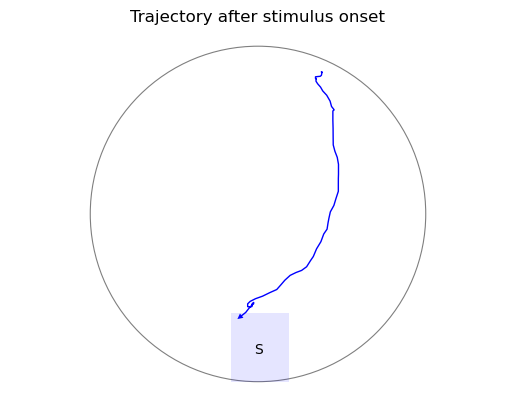

In [16]:
trajectory(shelter_x, shelter_y, x_diam, y_diam, escape_only)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

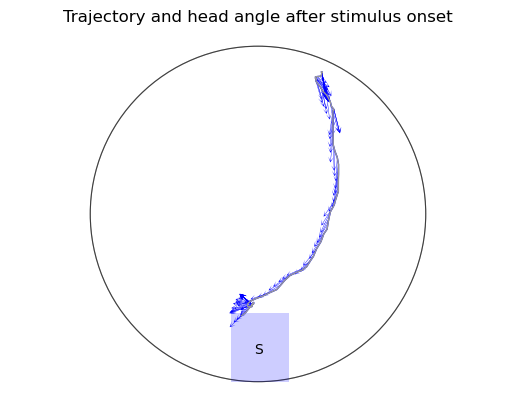

In [17]:
head_angle_trajectory_figure(shelter_x, shelter_y, x_diam, y_diam, escape_only)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

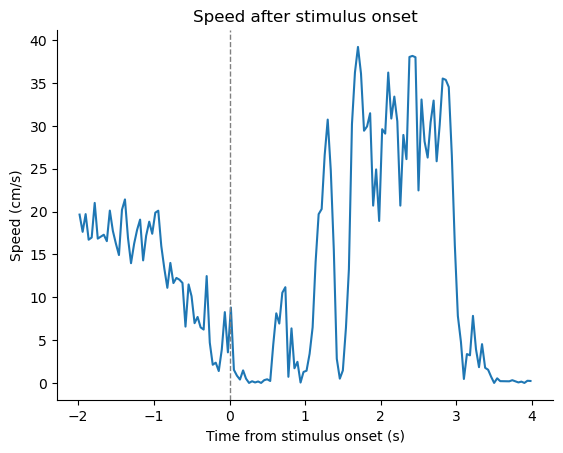

In [18]:
speed_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

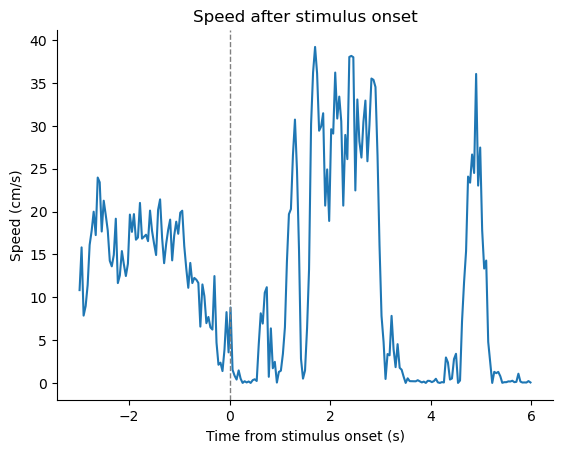

In [19]:
speed_figure(six_second['time_set'].iloc[-1],4, six_second)


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

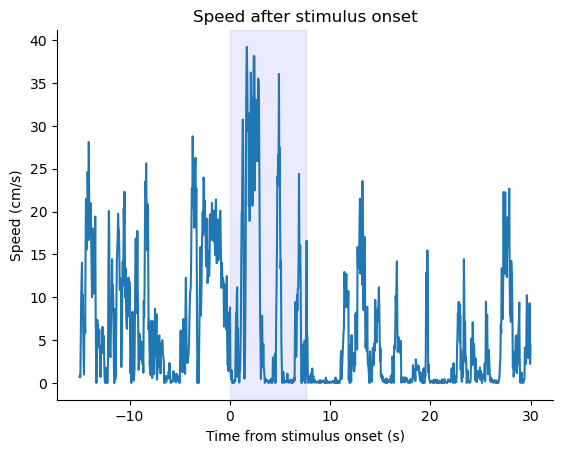

In [20]:
speed_figure(end,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

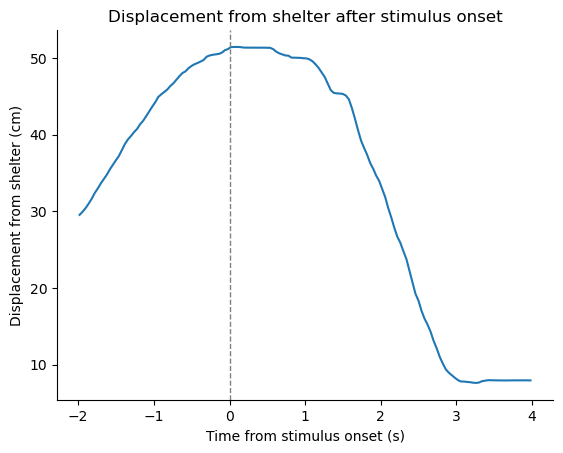

In [21]:
displacement_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

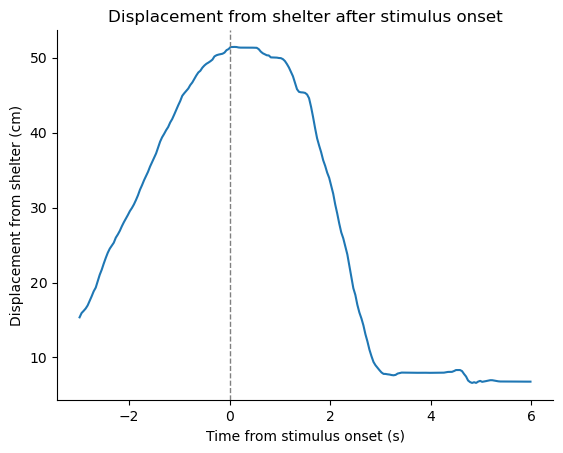

In [22]:
displacement_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

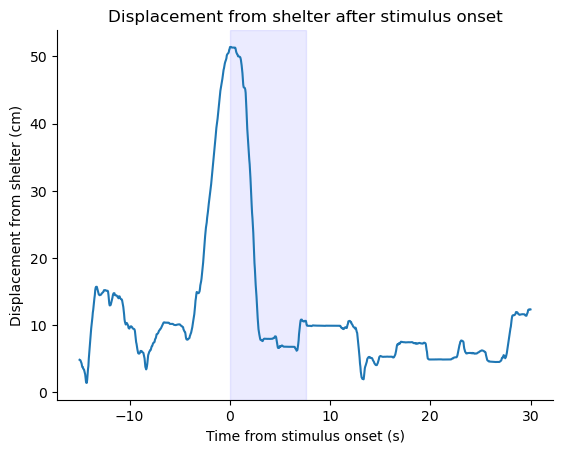

In [23]:
displacement_figure(end,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

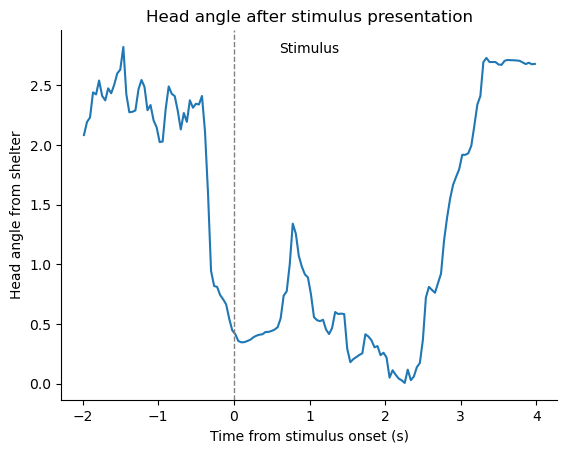

In [24]:
head_angle_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

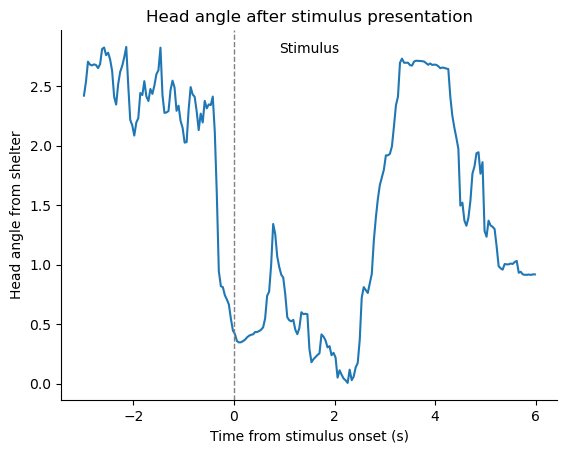

In [25]:
head_angle_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

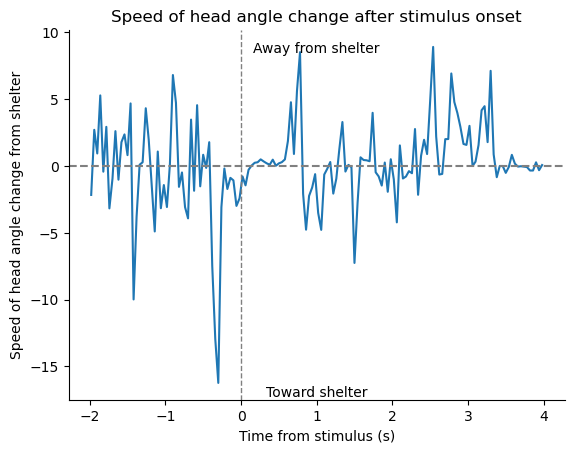

In [26]:
angle_speed_figure(four_second['time_set'].iloc[-1], 4,four_second)

In [27]:
ratio, initial_displacement, total_distance = linearity_ratio(escape_only)

In [28]:
shelter_rotation(shelter_x, shelter_y, escape_only)

ValueError: Cannot set a DataFrame with multiple columns to the single column normalized_x

In [ ]:
likelihood_data, likelihood_minus_nose, likelihood_center = likelihood_check(0, 8, .9, coord_scaled)

In [ ]:
likelihood_data #need to adjust time frame to be useful 